# **Systèmes multivariables**
### <div style="text-align: right"> <strong>A. Mhamdi</strong> </div>
-----

**Table des matières**
1. [Représentation d'état](#re)
2. [Rappel sur le calcul matriciel](#rapp-alg)
3. [Commande par retour d'étatl](#cde-etat)

## Représentation d'état <a name="re"></a>

$$\dfrac{dX}{dt} \;=\; AX+Bu$$
$$y \;=\; CX+Du$$

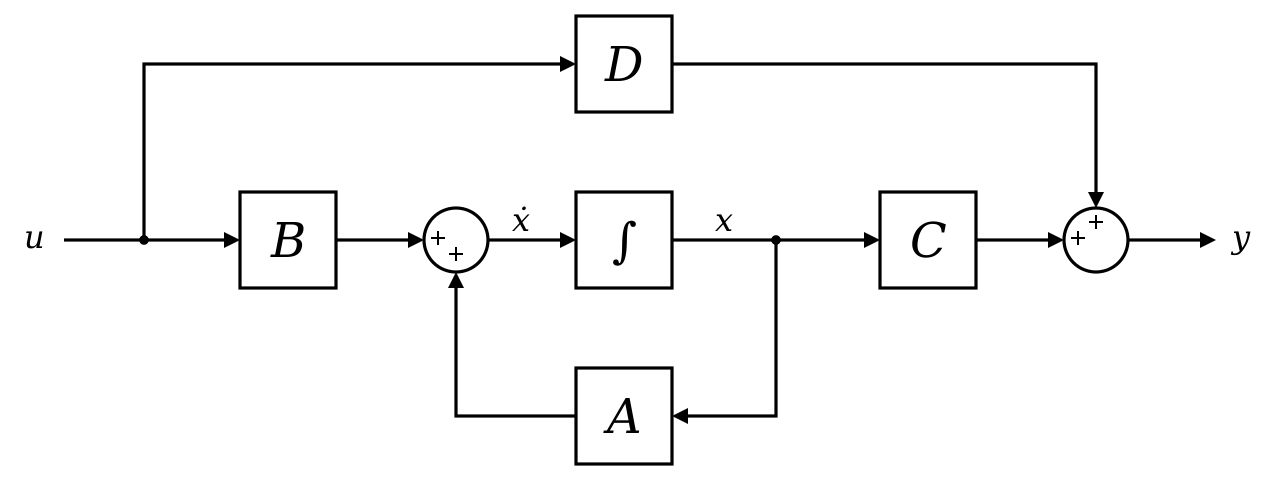

De façon générale :

$$ 
\sum_{i=0}^{n}a_iy^{(i)} \;=\; \sum_{j=0}^{m}b_ju^{(j)}\qquad \text{avec}\quad m\leq n\\
a_0y+a_1y^{(1)}+\cdots+a_ny^{(n)} \;=\; b_0u+b_1u^{(1)}+\cdots+b_mu^{(m)} 
$$
La matrice $D$ n'existe que pour $m=n$.

In [1]:
from scipy.signal import StateSpace as ss
from scipy.signal import step
import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = [15, 10]
plt.rc({"keymap.grid": "g", "font.serif": "Charter", "font.size": 10})
import tikzplotlib as mikz

### Exemples illustratifs

#### Exemple \#1

$$3\frac{dx}{dt}+12x \;=\; 6u$$
$$y = x$$
Soit encore
$$\frac{dx}{dt}\;=\; \underbrace{-4}_{A}x+\underbrace{2}_{B}u$$
$$y=\underbrace{1}_{C}x+\underbrace{0}_{D}u$$


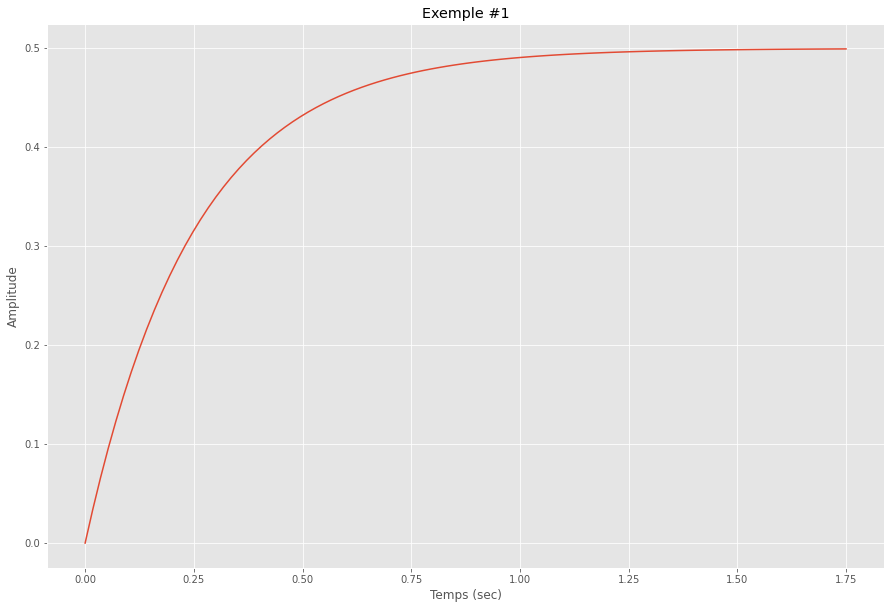

In [2]:
A, B, C, D = -4.0, 2.0, 1.0, 0.0

sys_1 = ss(A, B, C, D)
t1, y1 = step(sys_1) # u est un échelon

plt.plot(t1, y1)
plt.grid(True)
plt.xlabel('Temps (sec)')
plt.ylabel('Amplitude')
plt.title('Exemple #1')
mikz.save("../mikz/jn/eg-1.tex")

**Signal d'entrée arbitraire**

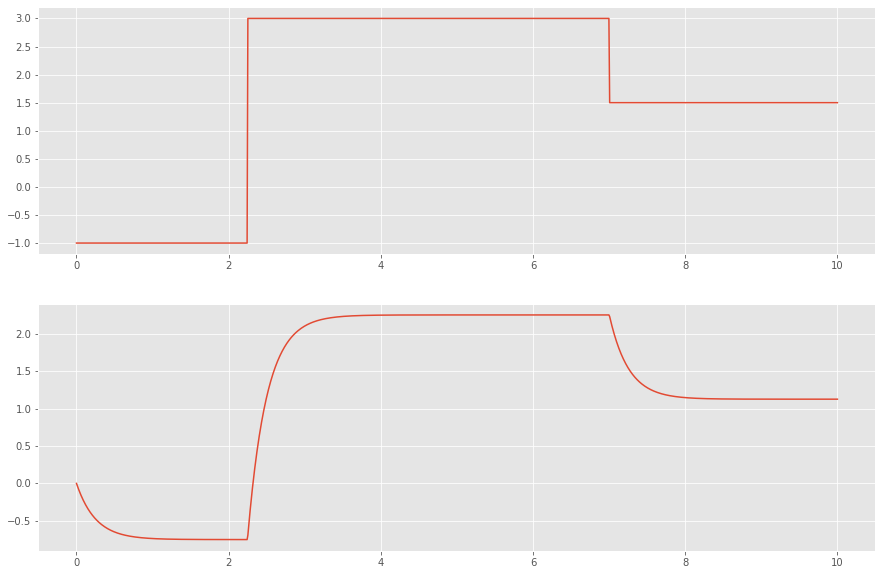

In [3]:
A, B, C, D = -4.0, 3.0, 1.0, 0.0
from scipy.signal import lsim
import numpy as np
sys_1 = ss(A, B, C, D)
t = np.linspace(0, 10, 1000)
u = np.zeros(len(t))
u[0:225] = -1; u[225:700] = 3; u[700:] = 1.5;
_, y, _ = lsim(sys_1, u, t)
plt.subplot(2, 1, 1)
plt.plot(t, u)
plt.grid(True)
plt.subplot(2, 1, 2)
plt.plot(t, y)
plt.grid(True)
mikz.save("../mikz/jn/eg-arb.tex")

#### Exemple \#2

On se donne l'exemple d'un système de 2$^\text{nd}$ ordre où les variables d'état sont explicitement données :
$$2\dfrac{dx_1}{dt}+6x_1 \;=\; 8u \rightarrow \dfrac{dx_1}{dt}= \dot{x}_1 = -3x_1+0x_2+4u$$ 
$$3\dfrac{dx_2}{dt}+6x_1 +9x_2\;=\; 0 \rightarrow \dfrac{dx_2}{dt}=\dot{x}_2 = -2x_1-3x_2$$
$$y \;=\; \dfrac{x_1+x_2}{2} \rightarrow y = 0.5x_1 + 0.5x_2+0 u$$

La représentation d'état est

$$\underbrace{\left[\begin{array}{c}\dot{x}_1\\ \dot{x}_2\end{array}\right]}_{\dot{X}} = \underbrace{\left(\begin{array}{cc}-3& 0 \\ -2 & -3 \end{array}\right)}_{A}\underbrace{\left[\begin{array}{c}x_1\\ x_2\end{array}\right]}_{X} + \underbrace{\left[\begin{array}{c}4\\ 0\end{array}\right] }_{B} u$$

$$y = \underbrace{\left[\begin{array}{cc}0.5 & 0.5\end{array}\right]}_{C}\underbrace{\left[\begin{array}{c}x_1\\ x_2\end{array}\right]}_{X} +\underbrace{0}_{D} u$$


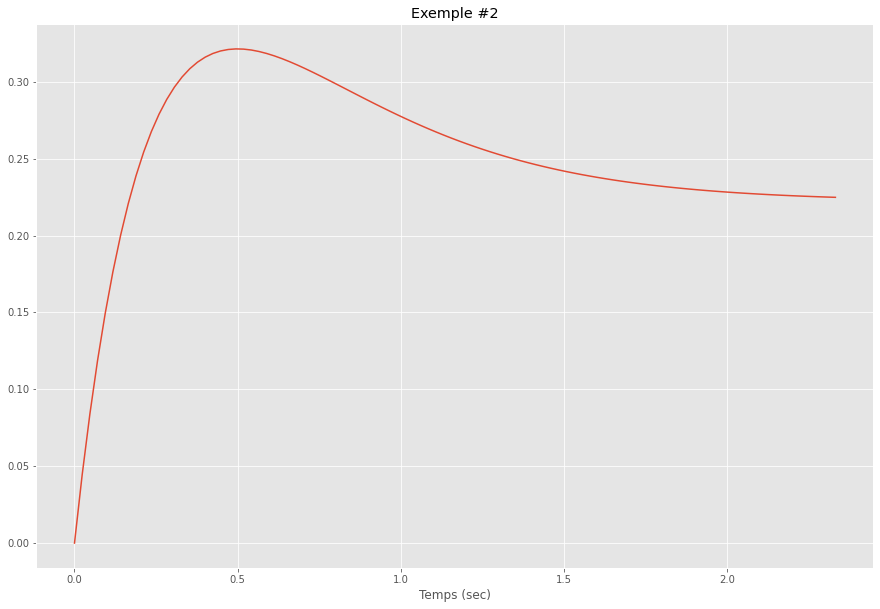

In [4]:
A = [[-3.0, 0.0], [-2.0, -3.0]] # Matlab: A = [-3, 0; -2, -3]
B = [[4.0], [0.0]]
C = [0.5, 0.5]
D = 0.0
sys_2 = ss(A, B, C, D)
t2, y2 = step(sys_2)
plt.plot(t2, y2)
plt.grid(True)
plt.xlabel('Temps (sec)')
plt.title('Exemple #2')
mikz.save("../mikz/jn/eg-2.tex")

#### Exemple \#3 

$$4\dfrac{d^2y}{dt^2}+2\dfrac{dy}{dt}+y\;=\; 3u$$

Soit $x_1=y$ et $x_2=\dfrac{dy}{dt}$

$$\dot{x}_1 = \dfrac{dx_1}{dt} = \dfrac{dy}{dt} = x_2 = 0x_1+x_2+0u$$

$$4\overbrace{\dfrac{d^2y}{dt^2}}^{\dot{x}_2}+2\overbrace{\dfrac{dy}{dt}}^{x_2}+\overbrace{y}^{x_1}\;=\; 3u$$

$$\dot{x}_2 = \dfrac{dx_2}{dt}= \dfrac{d^2y}{dt^2}=-\dfrac{2}{4}x_2-\dfrac{1}{4}x_1+\dfrac{3}{4}u$$
Soit encore
$$\dot{x}_2 =-0.25x_1-0.5 x_2+0.75u$$

$$\underbrace{\left[\begin{array}{c}\dot{x}_1\\ \dot{x}_2\end{array}\right]}_{\dot{X}} = \underbrace{\left(\begin{array}{cc} {\color{red}a} & {\color{red}b} \\ {\color{red}c} & {\color{red}d} \end{array}\right)}_{A}\underbrace{\left[\begin{array}{c}x_1\\ x_2\end{array}\right]}_{X} + \underbrace{\left[\begin{array}{c}{\color{blue}\alpha}\\ {\color{blue}\beta}\end{array}\right] }_{B} u$$

$$y = \underbrace{\left[\begin{array}{cc}{\color{green}\gamma} &  {\color{green}\sigma}\end{array}\right]}_{C}\underbrace{\left[\begin{array}{c}x_1\\ x_2\end{array}\right]}_{X}$$


$$\underbrace{\left[\begin{array}{c}\dot{x}_1\\ \dot{x}_2\end{array}\right]}_{\dot{X}} = \underbrace{\left(\begin{array}{cc} {\color{red}0} & {\color{red}1} \\ {\color{red}{-0.25}} & {\color{red}{-0.5}} \end{array}\right)}_{A}\underbrace{\left[\begin{array}{c}x_1\\ x_2\end{array}\right]}_{X} + \underbrace{\left[\begin{array}{c}{\color{blue}0}\\ {\color{blue}{0.75}}\end{array}\right] }_{B} u$$

$$y = \underbrace{\left[\begin{array}{cc}{\color{green}1} &  {\color{green}0}\end{array}\right]}_{C}\underbrace{\left[\begin{array}{c}x_1\\ x_2\end{array}\right]}_{X}$$

[-0.25+0.4330127j -0.25-0.4330127j]


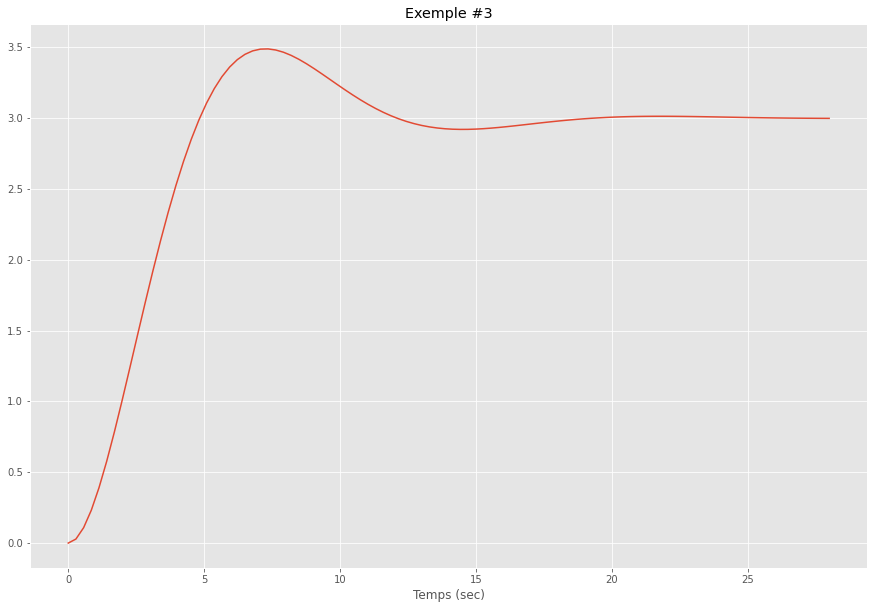

In [5]:
A = [[0.0, 1.0], [-0.25, -0.5]] 
import numpy as np
valp = np.linalg.eig(A)[0]
print(valp)
B = [[0.0], [0.75]]
C = [1.0, 0.0]
D = 0.0
sys_3 = ss(A, B, C, D)
t3, y3 = step(sys_3)
plt.plot(t3, y3)
plt.grid(True)
plt.xlabel('Temps (sec)')
plt.title('Exemple #3')
mikz.save("../mikz/jn/eg-3.tex")

[-0.25  0.25]


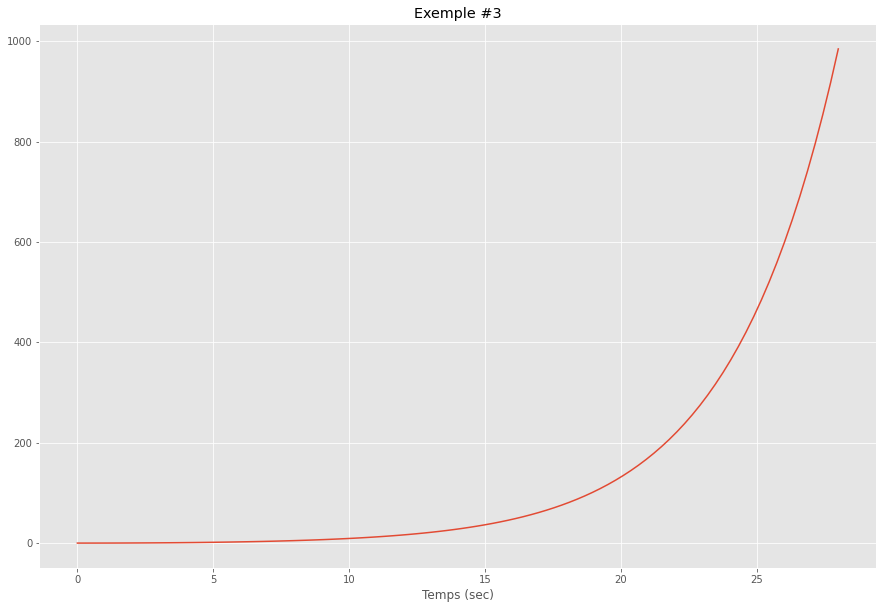

In [6]:
A = [[-0.25, 0.15], [0.0, 0.25]] 
import numpy as np
valp = np.linalg.eig(A)[0]
print(valp)
B = [[0.0], [0.75]]
C = [1.0, 0.0]
D = 0.0
sys_3 = ss(A, B, C, D)
t3, y3 = step(sys_3)
plt.plot(t3, y3)
plt.grid(True)
plt.xlabel('Temps (sec)')
plt.title('Exemple #3')
mikz.save("../mikz/jn/eg-3-insta.tex")

## Exemple \#4

$$2\dfrac{dx_1}{dt}+x_1^2+3x_2^2 = 16u \Rightarrow \dfrac{dx_1}{dt} \;=\; \mathcal{F}_1\left(x_1, x_2, u\right) \;=\; -\dfrac{1}{2}x_1^2 -\dfrac{3}{2}x_2^2+\dfrac{16}{2}u $$
$$3 \dfrac{dx_2}{dt}+6x_1^2+6x_2^2 = 0 \Rightarrow \dfrac{dx_2}{dt} \;=\; \mathcal{F}_2\left(x_1, x_2, u\right) \;=\; -2x_1^2 -2x_2^2+0\times u$$
$$y_1 = x_2$$
$$y_2 = x_1$$
avec $\bar{u}=1, \qquad \bar{x}=\left[\begin{array}{c}2\\2\end{array}\right]$

### Calcul de $\dfrac{dx_1}{dt}$
$$ \dfrac{dx_1}{dt} \;=\; \mathcal{F}_1\left(x_1, x_2, u\right) \;=\; -\dfrac{1}{2}x_1^2 -\dfrac{3}{2}x_2^2+8u$$

$$ \dfrac{\partial \mathcal{F}_1}{\partial x_1} \, =\, -x_1 \qquad \dfrac{\partial \mathcal{F}_1}{\partial x_1}_{|\bar{u}, \bar{x}} \,=\, -2$$

$$ \dfrac{\partial \mathcal{F}_1}{\partial x_2} \, =\, -3x_2 \qquad \dfrac{\partial \mathcal{F}_1}{\partial x_2}_{|\bar{u}, \bar{x}} \,=\, -6$$

$$ \dfrac{\partial \mathcal{F}_1}{\partial u} \, =\, 8 \qquad \dfrac{\partial \mathcal{F}_1}{\partial u}_{|\bar{u}, \bar{x}} \,=\, 8$$

$$ \dfrac{dx_1}{dt} \;=\; \left(\begin{array}{ccc}
{\dfrac{\partial \mathcal{F}_1}{\partial x_1}_{|\bar{u}, \bar{x}}} && {\dfrac{\partial \mathcal{F}_1}{\partial x_2}_{|\bar{u}, \bar{x}}} 
\end{array}\right) \left[\begin{array}{c}
x_1\\x_2
\end{array}\right] + {\dfrac{\partial \mathcal{F}_1}{\partial u}_{|\bar{u}, \bar{x}}} u$$

$$ \dfrac{dx_1}{dt} \;=\; \left(\begin{array}{ccc}
-2 && -6
\end{array}\right) \left[\begin{array}{c}
x_1\\x_2
\end{array}\right] + 8 u$$


### Calcul de $\dfrac{dx_2}{dt}$

$$\dfrac{dx_2}{dt} \;=\; \mathcal{F}_2\left(x_1, x_2, u\right) \;=\; -2x_1^2 -2x_2^2$$

$$ \dfrac{\partial \mathcal{F}_2}{\partial x_1} \, =\, -4x_1 \qquad \dfrac{\partial \mathcal{F}_2}{\partial x_1}_{|\bar{u}, \bar{x}} \,=\, -8$$

$$ \dfrac{\partial \mathcal{F}_2}{\partial x_2} \, =\, -4x_2 \qquad \dfrac{\partial \mathcal{F}_1}{\partial x_2}_{|\bar{u}, \bar{x}} \,=\, -8$$

$$ \dfrac{\partial \mathcal{F}_2}{\partial u} \, =\, 0 \qquad \dfrac{\partial \mathcal{F}_2}{\partial u}_{|\bar{u}, \bar{x}} \,=\, 0$$

$$ \dfrac{dx_2}{dt} \;=\; \left(\begin{array}{ccc}
{\dfrac{\partial \mathcal{F}_2}{\partial x_1}_{|\bar{u}, \bar{x}}} && {\dfrac{\partial \mathcal{F}_2}{\partial x_2}_{|\bar{u}, \bar{x}}} 
\end{array}\right) \left[\begin{array}{c}
x_1\\x_2
\end{array}\right] + {\dfrac{\partial \mathcal{F}_2}{\partial u}_{|\bar{u}, \bar{x}}} u$$

$$ \dfrac{dx_2}{dt} \;=\; \left(\begin{array}{ccc}
-8 && -8
\end{array}\right) \left[\begin{array}{c}
x_1\\x_2
\end{array}\right] + 0 u$$


$$\left[\begin{array}{c}
\dfrac{dx_1}{dt} \\ \dfrac{dx_2}{dt}
\end{array}\right] \quad = \quad \left(\begin{array}{ccc}
-2 && -6\\ && \\ -8 && -8 \end{array}\right) \left[\begin{array}{c}
x_1 \\ \\ x_2
\end{array}\right] + \left[\begin{array}{c}
8 \\ \\ 0
\end{array}\right] u
$$

$$
\left[\begin{array}{c}
y_1 \\ \\ y2
\end{array}\right] \;=\; \left[\begin{array}{ccc}
0 && 1\\ &&\\ 1 && 0
\end{array}\right] \left[\begin{array}{c}
x_1 \\ \\ x_2
\end{array}\right] + \left[\begin{array}{c}
0 \\ \\ 0
\end{array}\right]  u
$$

In [7]:
import numpy as np
from scipy.signal import StateSpace as ss
from scipy.signal import step
import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = [15, 10]
plt.rc({"keymap.grid": "g", "font.serif": "Charter", "font.size": 10})
import tikzplotlib as mikz

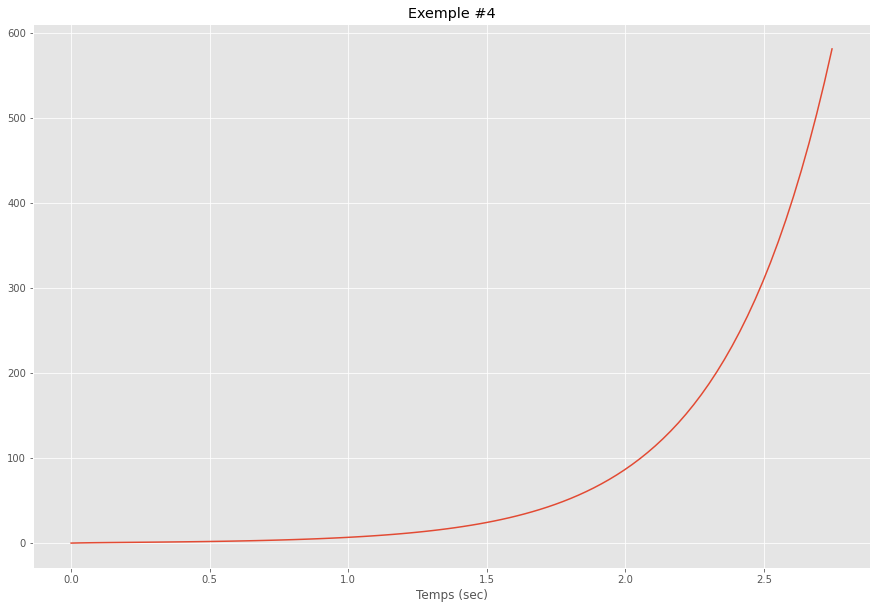

In [8]:
A = np.array([[-2.0, -6.0], [-8, -8]])
B = np.array([[8.0], [0.0]])
C = np.array([1,1])
D = np.array([0])
sys4 = ss(A, B, C, D)
t4, y4 = step(sys4)
plt.plot(t4, y4)
plt.grid(True)
plt.xlabel('Temps (sec)')
plt.title('Exemple #4')
mikz.save("../mikz/jn/eg-lin.tex")

## Exemple \# 6

Soit l'équation différentielle suivante :
$$
y^{(2)}+y^{(1)}+y \;=\; u^{(1)}+u
$$
On pose :
$$
x_1 \;=\; y \qquad \text{et} \qquad x_2\;=\; y^{(1)}+\color{red}{\alpha u}
$$
On calcule les derivées de $x_1$ et de $x_2$ :
$$
\dot{x}_1 \;=\; y^{(1)} \;=\; x_2 -\color{red}{\alpha u}
$$
$$
\dot{x}_2 \;=\; y^{(2)}+\color{red}{\alpha u^{(1)}}
$$
Or :
$$
y^{(2)}\;=\;-y^{(1)}-y + u^{(1)}+u
$$
Il en découle :
$$
\dot{x}_2 \;=\; -y^{(1)}-y + u^{(1)}+u+\color{red}{\alpha u^{(1)}}\\
\dot{x}_2 \;=\; -\underbrace{y^{(1)}}_{x_2-\alpha u}-\underbrace{y}_{x_1} + \underbrace{\left(\color{red}{\alpha}+1\right)}_{=0 \;\text{ssi}\; \alpha=-1}u^{(1)}+u
$$
L'expression de $\dot{x}_2$ se simplifie en :
$$
\dot{x}_2 \;=\; -x_2+\alpha u -x_1+u, \qquad \text{avec}\; \alpha\,=\,-1
$$
$$
\dot{x}_2 \;=\; -x_2 -x_1
$$
La représentation d'état est alors :
$$
\left[\begin{array}{c}\dot{x}_1\\\\\dot{x}_2\end{array}\right] \;=\; 
\left(\begin{array}{ccc}0 && 1\\&&\\-1&&-1\end{array}\right)
\left[\begin{array}{c}x_1\\\\x_2\end{array}\right]
+
\left[\begin{array}{c}1\\\\0\end{array}\right]u\\
y \;=\; \left[\begin{array}{ccc}1 && 0\end{array}\right]\left[\begin{array}{c}x_1\\\\x_2\end{array}\right]
$$

## Rappel sur le calcul matriciel <a name="rapp-alg"></a>

Soit $A \in \mathcal{M}_{n, n}\left(\mathbb{C}\right)$

$$A = \left(\begin{array}{cc}\overbrace{1}^{a_{11}} & 2\\ -1 & \underbrace{1}_{a_{22}}\end{array}\right)$$
La trace de $A$ est $a_{11} + a_{22} = 1+1=2$

$$\text{tr}\{A\} = \sum_{i=1}^{n} \lambda_i$$

Soit la fonction suivante :

$$\mathcal{F} : \mathbb{R}^2 \rightarrow \mathbb{R}^2$$
$$\mathcal{F}\left(\begin{array}{c}x\\\\y\end{array}\right)=\left(\begin{array}{ccc}2 && 0\\ && \\ 1 && 1\end{array}\right)\left(\begin{array}{c}x\\\\y\end{array}\right)$$

$$\text{det}\{A\} \;=\; \prod_{i=1}^{n}\lambda_i  $$

$$\text{tr}\{A\} \;=\; 3 \;=\; \lambda_1 +\lambda_2 $$

$$\text{det}\{A\} \;=\; 2 \;=\; \lambda_1 \times \lambda_2 $$

$$\left\{\begin{array}{ccccc}\lambda_1+\lambda_2 &=& 3 &=& \Sigma\\
&& \\
\lambda_1\lambda_2 &=& 2 &=& \Pi\end{array}\right.$$

$$\left(x-x_1\right)\left(x-x_2\right) = x^2 -xx_2-xx_1+x_1x_2 = x^2 -\underbrace{\left(x_1+x_2\right)}_{\Sigma}x+\underbrace{x_1x_2}_{\Pi}$$


$$\lambda^2-\Sigma\lambda+\Pi \;=\; 0$$

$$\lambda^2-3\lambda+2 \;=\; 0$$

$$\lambda_1 = 1 \quad\&\quad \lambda_2 = 2$$


In [9]:
import numpy as np

In [10]:
A = np.array([[2.0, 0.0], [1.0, 1.0]])
print(np.linalg.eig(A)[0])

[1. 2.]



$$M = \left(\begin{array}{ccc}m_{11} && m_{12}\\ &&\\ m_{21} && m_{22} \end{array}\right)$$

$$\begin{array}{ccl}\text{det}\{\lambda\textrm{I}-M\} &=&  \left|\begin{array}{ccc}\lambda-m_{11} && -m_{12}\\ &&\\ -m_{21} && \lambda-m_{22} \end{array}\right|\\
&=& \left(\lambda-m_{11}\right)\left(\lambda-m_{22}\right)-m_{12}m_{21}\\
&=& \lambda^2 - \lambda\underbrace{\left(m_{11}+m_{22}\right)}_{\text{tr}\{M\}} + \underbrace{m_{11}m_{22}-m_{12}m_{21}}_{\text{det}\{M\}}
\end{array}$$

In [11]:
A = np.array([[1.0, 1.0], [0.0, 1.0]])
print(np.linalg.eig(A)[0])
print(np.linalg.eig(A)[1])

[1. 1.]
[[ 1.00000000e+00 -1.00000000e+00]
 [ 0.00000000e+00  2.22044605e-16]]


In [12]:
## Commande par retour d'état<a name="cde-etat"></a>

In [13]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = [15, 10]
plt.rc({"keymap.grid": "g", "font.serif": "Charter", "font.size": 10})
import tikzplotlib as mikz

In [14]:
#!pip install slycot
#!pip install control

In [15]:
import control

In [16]:
A = np.array([[-1.0, 2.0], [0.1, -3.0]])
B = np.array([[1.0], [1.0]])
C = np.array([[1.0, 1.0]])
D = 0.0

In [17]:
print("La dimension de A est {}.".format(A.shape))
print("La dimension de B est {}.".format(B.shape))
print("La dimension de C est {}.".format(C.shape))

La dimension de A est (2, 2).
La dimension de B est (2, 1).
La dimension de C est (1, 2).


**Commandabilité**

In [18]:
AB = np.matmul(A, B)
cde = np.concatenate((B, AB), axis=1)
np.linalg.matrix_rank(cde)

2

**Observabilité**

In [19]:
CA = np.matmul(C, A)
obs = np.concatenate((C, CA), axis=0)
np.linalg.matrix_rank(obs)

2

**Mise du système sous la forme d'une représentation d'état**

In [20]:
sys = control.ss(A,B,C,D)
print(sys)

A = [[-1.   2. ]
     [ 0.1 -3. ]]

B = [[1.]
     [1.]]

C = [[1. 1.]]

D = [[0.]]



**Calcul de la fonction de transfert**

In [21]:
H = control.ss2tf(sys)

**Détermination de la réponse indicielle du système**

In [22]:
T = np.linspace(0, 15, 1500)
t, y = control.step_response(sys, T=T)

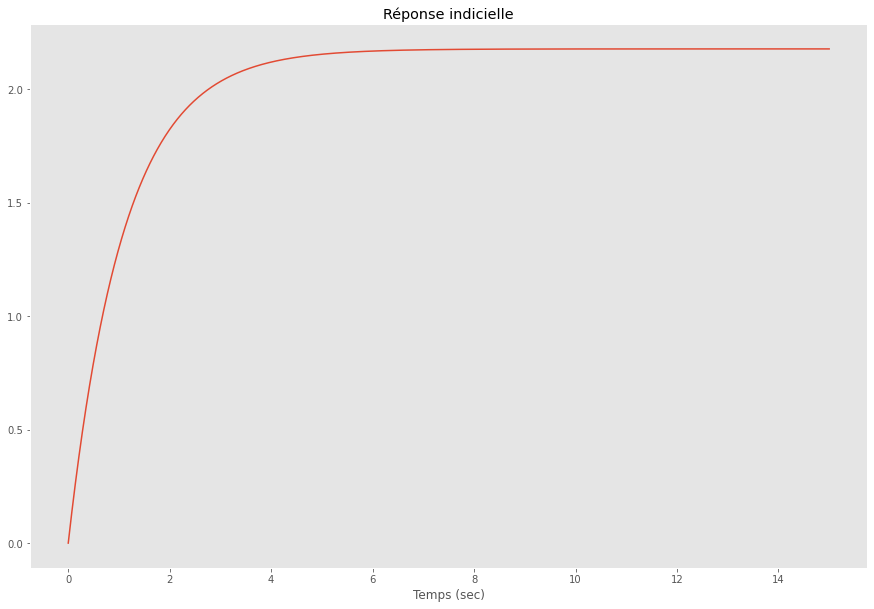

In [23]:
plt.plot(t, y)
plt.title("Réponse indicielle en boucle ouverte")
plt.xlabel('Temps (sec)')
plt.grid()
mikz.save("../mikz/jn/cde-retour-etat-bo-eg1.tex")

###### **Synthèse d'une commande par retour d'état**

**Gain de retour `L`**

In [24]:
L = control.place(A,B,[-4,-5])

**Précompensateur `l`**

In [25]:
A_BL = A-np.matmul(B, L)
l = -1/(
    np.matmul(C, 
              np.matmul(np.linalg.inv(A_BL), B))
    )

In [26]:
A_cl = A_BL
B_cl = B*l
C_cl = C
D_cl = 0

sys_cl = control.ss(A_cl, B_cl, C_cl, D_cl)

In [27]:
T = np.linspace(0, 15, 1500)
t, y_cl = control.step_response(sys_cl, T=T)

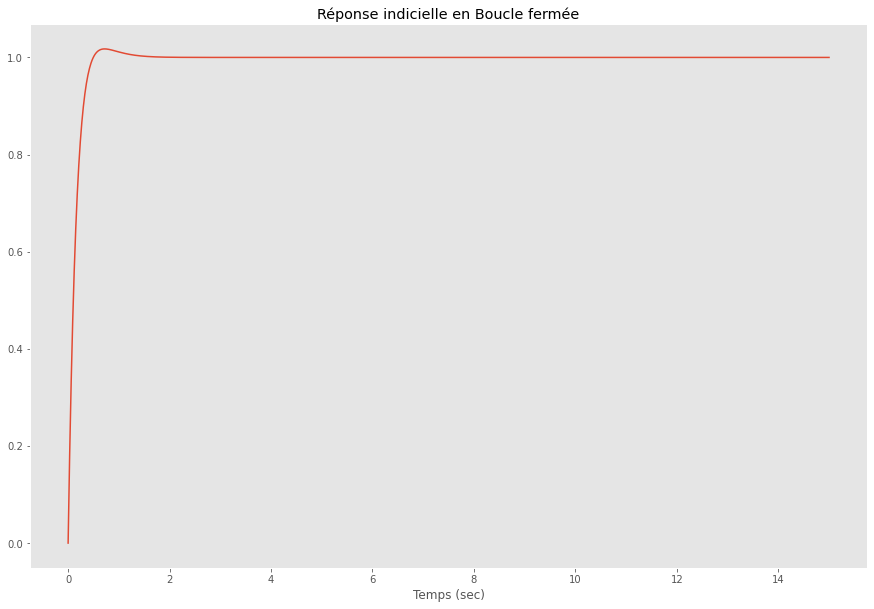

In [28]:
plt.plot(t, y_cl)
plt.title("Réponse indicielle en boucle fermée")
plt.xlabel('Temps (sec)')
plt.grid()
mikz.save("../mikz/jn/cde-retour-etat-bf-eg1.tex")